In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# loading the dataset into pandas dataframe
df = pd.read_csv("dataset/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [52]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [53]:
# Cek data null
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [55]:
df['isFraud'].value_counts() 

0    6354407
1       8213
Name: isFraud, dtype: int64

In [59]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['isFraud']==0)] 
df_minority = df[(df['isFraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 6354407, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [60]:
df_upsampled['isFraud'].value_counts()

1    6354407
0    6354407
Name: isFraud, dtype: int64

In [63]:
result = df_upsampled[df_upsampled['isFraud'] == 1].groupby('type')['isFraud'].count()

result

type
CASH_OUT    3185391
TRANSFER    3169016
Name: isFraud, dtype: int64

<h3><b>Transform Data Kategori to Number

In [64]:
df_upsampled['type_number'] = df_upsampled['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

In [65]:
# Ambil fitur yang dibutuhkan
df_upsampled = df_upsampled[['amount','type_number','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [66]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12708814 entries, 6283817 to 6362323
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   type_number     int64  
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(3)
memory usage: 872.6 MB


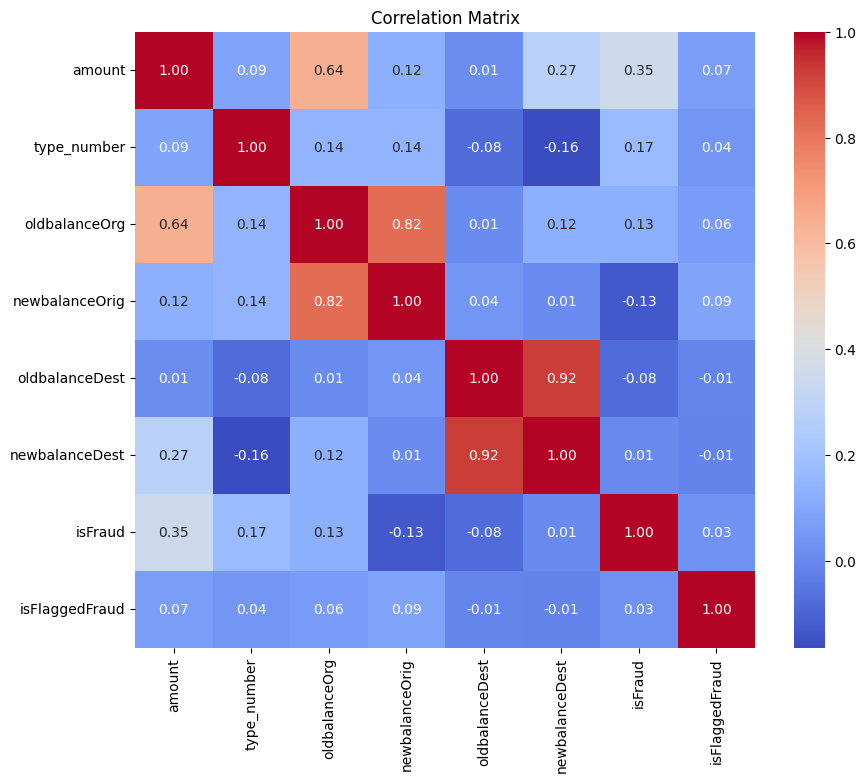

In [67]:
import seaborn as sns

correlation_matrix = df_upsampled.corr()

plt.figure(figsize=(10, 8))  # Ukuran figur (opsional, disesuaikan sesuai kebutuhan)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [68]:
correlation_matrix['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.345630
type_number       0.171615
oldbalanceOrg     0.125447
isFlaggedFraud    0.031027
newbalanceDest    0.007498
oldbalanceDest   -0.082056
newbalanceOrig   -0.132097
Name: isFraud, dtype: float64

In [72]:
# Memuat fitur-fitur ke variabel X
X = df_upsampled.drop('isFraud',axis=1)


# Memuat fitur target ke variabel Y
y = df_upsampled['isFraud']

In [73]:
# Pemisahan train dan test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

# Resampling dengan oversampling menggunakan SMOTE
# X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

In [76]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

classifier = LogisticRegression (solver='liblinear')
# classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [77]:
# Prediction with the test set
y_predict = classifier.predict(X_test)

In [80]:
# Compute Model Accuracy.

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test,y_predict))

0.821327713437784


In [81]:
import pickle

# Simpan model ke dalam file pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)